In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import csv



In [42]:
pd.set_option('display.max_columns', None)

In [43]:
model_features_path = '../data/model_features.csv'
transformed_data_men_path = '../data/transformed_data_men_21_to_24.csv'
season_dates_path = '../data/season_dates.csv'


In [44]:

# Load the datasets
model_features = pd.read_csv('../data/model_features.csv')
transformed_data = pd.read_csv('../data/transformed_data_men_21_to_24.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in model_features.columns:
    model_features.drop('Unnamed: 0', axis=1, inplace=True)

if 'Unnamed: 0' in transformed_data.columns:
    transformed_data.drop('Unnamed: 0', axis=1, inplace=True)

# Identify redundant columns
redundant_columns = set(model_features.columns).intersection(transformed_data.columns)

# Join the dataframes and remove redundant columns
joined_df = pd.concat([transformed_data, model_features.drop(redundant_columns, axis=1)], axis=1)

# drop game result label
joined_df = joined_df.drop(columns=['won'])

# Save the joined dataframe to a new CSV file
joined_df.to_csv('../data/joined_dataset.csv', index=False)



In [45]:
joined_df.head()

,team,opponent,team_score,opponent_score,team_rank,opponent_rank,game_round,season_type,date,season_year,home_game,underdog,underdog_opp,fan_favorite,fan_favorite_opp,g,w,l,de,oe,te,pace,physicality_score,sos,srs,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,pf,tov,tov%,poss,ast_per_poss,ast_per_fg,tov_per_poss,ast_to_tov,poss_per_game,game_win_rate,g_opp,w_opp,l_opp,de_opp,oe_opp,te_opp,pace_opp,physicality_score_opp,sos_opp,srs_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,pf_opp,tov_opp,tov%_opp,poss_opp,ast_per_poss_opp,ast_per_fg_opp,tov_per_poss_opp,ast_to_tov_opp,poss_per_game_opp,game_win_rate_opp,seed,conf,seed_opp,conf_opp,conf_rank,conf_rank_opp,plus_minus,luck,luck_opp,choke_rate,choke_rate_opp,upset_rate,upset_rate_opp,3mean_plus_minus,3mean_plus_minus_opp,win_streak,win_streak_opp,matchup_win_rate
0,Abilene Christian,East Tennessee State,70.0,47.0,NaN,NaN,NaN,regular_season,2020/11/25,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,25.0,13.0,12.0,98.254994,103.126160,1.049577,67.0,8.390000,0.30,1.65,24.800000,56.640000,0.438,8.040000,23.000000,0.350,11.800000,16.920000,0.697,10.120000,25.760000,35.880000,11.800000,7.360000,2.52,17.240000,13.560000,17.3,36.277000,0.325275,0.475806,0.373791,0.870206,1.451080,0.520000,14.0,Slnd,NaN,SC,15.0,15.0,23.0,0.666667,0.000000,0.0,0.0,0.0,0.000000,14.333333,-3.333333,0,0,0.0
1,Abilene Christian,Austin Peay,80.0,72.0,NaN,NaN,NaN,regular_season,2020/11/27,2021,0,0,0,0,1,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,27.0,14.0,13.0,100.518548,106.741125,1.061905,69.0,9.027778,-8.22,-6.66,27.148148,59.888889,0.453,7.185185,21.222222,0.339,12.851852,17.111111,0.751,12.629630,21.851852,34.481481,13.222222,6.777778,2.00,17.481481,14.703704,17.8,37.350000,0.354009,0.487040,0.393673,0.899244,1.383333,0.518519,14.0,Slnd,NaN,ASun,15.0,22.0,8.0,0.666667,0.571429,0.0,0.0,0.0,0.000000,14.333333,-0.333333,1,2,0.0
2,Abilene Christian,Nebraska Omaha,70.0,58.0,NaN,NaN,NaN,regular_season,2020/11/28,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,25.0,5.0,20.0,108.277778,93.500000,0.863520,72.0,7.550000,-2.09,-12.73,25.000000,59.760000,0.418,5.320000,15.880000,0.335,12.000000,17.440000,0.688,8.480000,25.640000,34.120000,9.440000,5.640000,3.00,18.840000,13.080000,16.1,37.884000,0.249182,0.377600,0.345264,0.721713,1.515360,0.200000,14.0,Slnd,NaN,Sum,15.0,12.0,12.0,0.666667,0.444444,0.0,0.0,0.0,0.000000,14.333333,-5.666667,2,1,0.0
3,Abilene Christian,Tarleton State,69.0,48.0,NaN,NaN,NaN,regular_season,2020/12/05,2021,1,0,0,1,0,29.0,24.0,5.0,83.955939,105.172414,1.25271,72.0,9.405172,-6.37,6.27,27.103448,60.413793,0.449,7.62069,22.172414,0.344,13.896552,20.482759,0.678,11.344828,24.758621,36.103448,17.689655,9.724138,2.965517,19.103448,13.586207,16.2,39.074138,0.45272,0.652672,0.347703,1.30203,1.347384,0.827586,20.0,10.0,10.0,90.289855,106.304348,1.177368,69.0,8.287500,-3.02,-7.28,26.500000,56.450000,0.469,5.500000,14.550000,0.378,14.850000,20.600000,0.721,8.500000,23.450000,31.950000,14.700000,10.450000,2.65,19.550000,11.550000,14.8,39.335000,0.373713,0.554717,0.293632,1.272727,1.966750,0.500000,14.0,Slnd,NaN,WAC,15.0,15.0,21.0,0.666667,0.000000,0.0,0.0,0.0,0.000000,14.33333

In [46]:
# Select numerical columns without missing values
numerical_cols = joined_df.select_dtypes(include=['number']).dropna(axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# pca_df.head(), pca.explained_variance_ratio_


In [47]:
# We will use the 'pca' object from the previous step to extract the PCA loadings.
# These loadings will map how each original feature contributes to each principal component.

# Since the pca object should already be fitted with our scaled data, we can directly access the components.
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numerical_cols.columns)



In [49]:
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
team_score,-0.036860,-0.127790,0.085097,0.119759,0.008691,-0.120286,-0.062910,0.024923,-0.094985,-0.031338,-0.003488,-0.197957,0.023637,0.024248,0.046431,0.009169,0.009181,0.147515,-0.061662,-0.207056,0.029353,0.093943,0.171449,0.076326,-0.049145,-0.157729,-0.033839,-0.044315,-0.201577,-0.370747,0.056921,0.373887,0.238638,-0.118181,-0.049899,0.075669,-0.014868,-0.166748,0.105123
opponent_score,-0.038781,0.127318,0.084813,0.119138,-0.008863,0.121456,-0.064681,0.024495,-0.094447,0.019853,-0.007228,-0.197790,-0.024467,0.023125,-0.045251,0.012328,0.005244,0.058929,0.126234,0.201142,-0.013072,0.096938,0.167725,-0.115351,0.108183,0.165811,0.044404,0.041289,-0.175219,-0.391360,0.175053,0.134670,0.374019,0.090705,0.035099,0.088496,-0.019778,0.160178,-0.090027
season_year,-0.033461,0.001022,0.005511,0.076251,-0.001474,0.002198,0.002113,0.033139,-0.292910,-0.002536,0.001910,0.049176,-0.003676,-0.312322,0.001117,0.091197,-0.009384,-0.230983,-0.072223,-0.003615,-0.004986,0.031923,-0.037365,-0.367833,-0.045194,-0.241173,-0.047656,-0.016883,-0.027808,0.162895,-0.103748,-0.024539,0.035655,0.010552,-0.004049,-0.006195,-0.221565,-0.007472,0.032791
home_game,0.005708,-0.062945,0.000630,0.007067,-0.006832,-0.457013,0.005466,0.007049,-0.011282,0.286857,0.061151,-0.004240,-0.049116,0.000847,-0.044015,0.000765,0.030128,-0.034172,0.080960,0.067879,0.001093,-0.005453,-0.005780,-0.047642,0.032793,0.078411,0.012532,-0.027267,0.006025,-0.010833,0.004504,-0.043526,0.030962,0.027812,-0.010920,-0.005026,-0.003812,0.003508,-0.002131
underdog,-0.094347,0.081366,0.007008,-0.094648,-0.019049,0.025145,0.067342,0.000465,0.001781,0.043832,0.033065,-0.061124,-0.045057,-0.004215,-0.007422,-0.023980,0.119197,-0.003380,0.251198,-0.168174,0.393914,0.112276,0.068599,0.038406,0.070186,-0.132367,0.048411,0.321091,0.112147,0.037996,-0.034911,0.104607,-0.199493,-0.015260,0.065925,0.446174,0.034590,0.183078,-0.143394


In [50]:
# loadings is DataFrame where columns are PCA components and indices are features
# Calculate the average absolute loading for each feature across all PCA components
average_loadings = loadings.abs().mean(axis=1)

# Sort the features based on their average loadings in descending order
sorted_features = average_loadings.sort_values(ascending=False).index.tolist()

# Output the sorted features
# sorted_features


/var/folders/nq/wq26v42s50v9qsf0ltxbsm4w0000gp/T/ipykernel_87082/1870847124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loadings.values, y=average_loadings.index, palette='viridis')


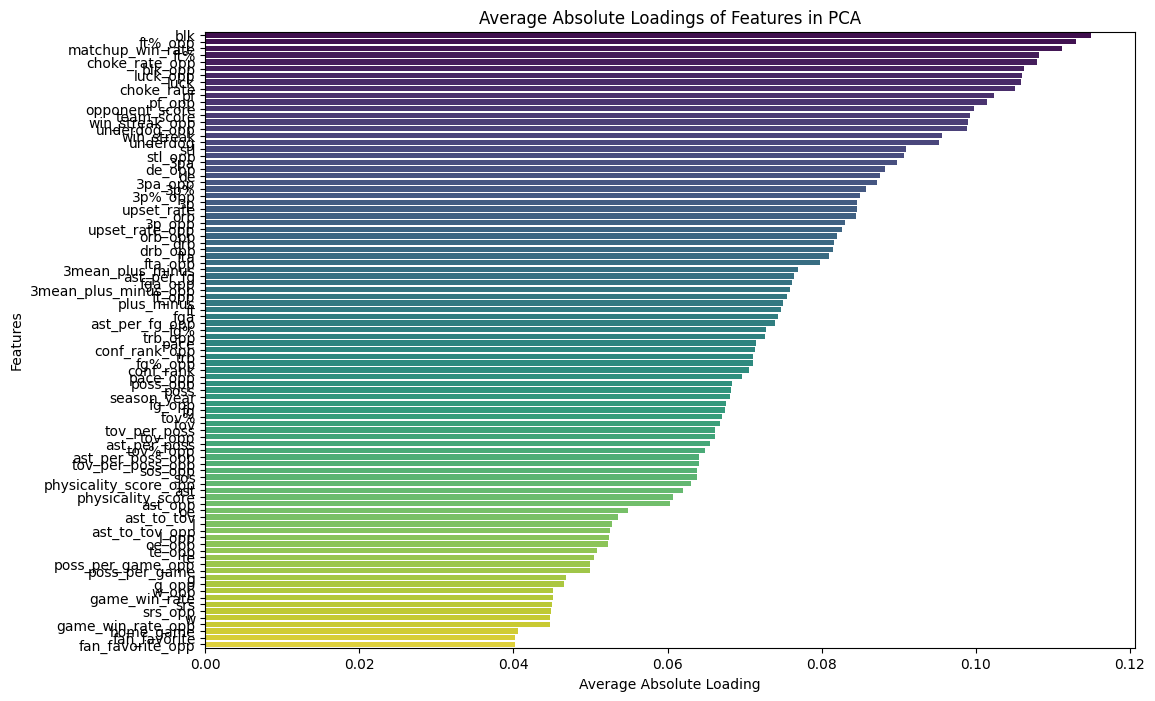

In [51]:


# Assuming pca_loadings_df is your DataFrame where columns are PCA components and indices are features
# Calculate the average absolute loading for each feature across all PCA components
average_loadings = loadings.abs().mean(axis=1).sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(12, 8))
sns.barplot(x=average_loadings.values, y=average_loadings.index, palette='viridis')
plt.xlabel('Average Absolute Loading')
plt.ylabel('Features')
plt.title('Average Absolute Loadings of Features in PCA')
plt.show()


In [52]:
# Function to identify the most influential features for each PCA component
def find_influential_features(pca_loadings, threshold=0.134):
    """
    This function finds the most influential features for each principal component.

    :param pca_loadings: DataFrame containing PCA loadings with features as index and components as columns
    :param threshold: The threshold for considering a feature influential (the average of the absolute values of the loadings across all principal components)
    :return: Dictionary with components as keys and lists of influential features as values
    """
    influential_features = {}
    ct = 0
    for component in pca_loadings.columns:
        # print(pca_loadings[component].abs())
        # Get the absolute values of the loadings for the component
        abs_loadings = pca_loadings[component].abs()
        # Identify features where the absolute loading is above the threshold
        influential = abs_loadings[abs_loadings >= threshold].index.tolist()
        # print(influential)
        ct += 1
        influential_features[component] = influential
    return influential_features

influential_features = find_influential_features(loadings)


In [53]:
# Find the key with the largest list
largest_key = max(influential_features, key=lambda k: len(influential_features[k]))

# Get the largest list
largest_list = influential_features[largest_key]

print(f"The largest list is {largest_list} from key '{largest_key}'")
# largest_list

The largest list is ['w', 'l', 'oe', 'te', 'sos', 'srs', 'fg', 'ast', 'tov%', 'ast_per_poss', 'tov_per_poss', 'ast_to_tov', 'game_win_rate', 'w_opp', 'l_opp', 'oe_opp', 'te_opp', 'sos_opp', 'srs_opp', 'fg_opp', 'ast_opp', 'tov%_opp', 'ast_per_poss_opp', 'tov_per_poss_opp', 'ast_to_tov_opp', 'game_win_rate_opp'] from key 'PC1'


In [54]:
file_name = '../data/influential_features.csv'

# Write the list to the CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(largest_list)

print(f"List has been written to {file_name}")


List has been written to ../data/influential_features.csv


In [38]:
# Check the shape of pca_df
print(pca_df.shape)

# Check the number of components PCA has retained
print(pca.n_components_)


(38352, 39)
39


In [59]:
# Use the inverse_transform method to reconstruct the data
reconstructed_data = pca.inverse_transform(pca_df)

# The reconstructed_data is in the scaled space, so inverse transform it back to original space
reconstructed_data_original_space = scaler.inverse_transform(reconstructed_data)

# Create a DataFrame for the reconstructed data
reconstructed_df = pd.DataFrame(data=reconstructed_data_original_space, columns=numerical_cols.columns)

# Calculate the Mean Squared Reconstruction Error
reconstruction_error = np.mean((numerical_cols.values - reconstructed_data_original_space) ** 2)


In [61]:
reconstructed_df.shape

(38352, 94)

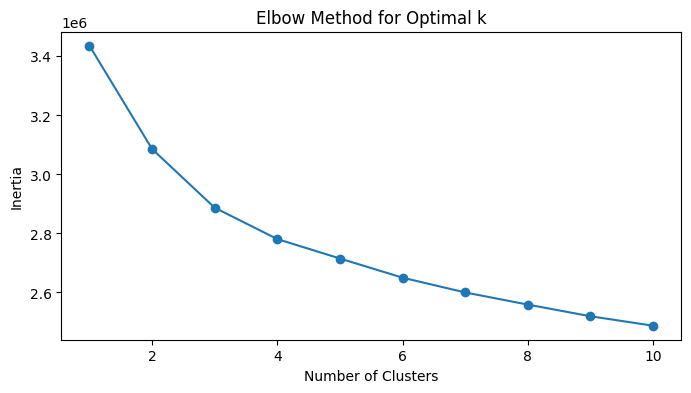

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [44]:
from sklearn.cluster import KMeans

# We have the pca_df from previous steps which is the PCA reduced dataframe.
# Now we will apply K-means clustering to it

# Number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fitting the input data and getting the cluster labels
pca_df['Cluster'] = kmeans.fit_predict(pca_df.iloc[:, :-1])  # Exclude the last column if it's 'Cluster'


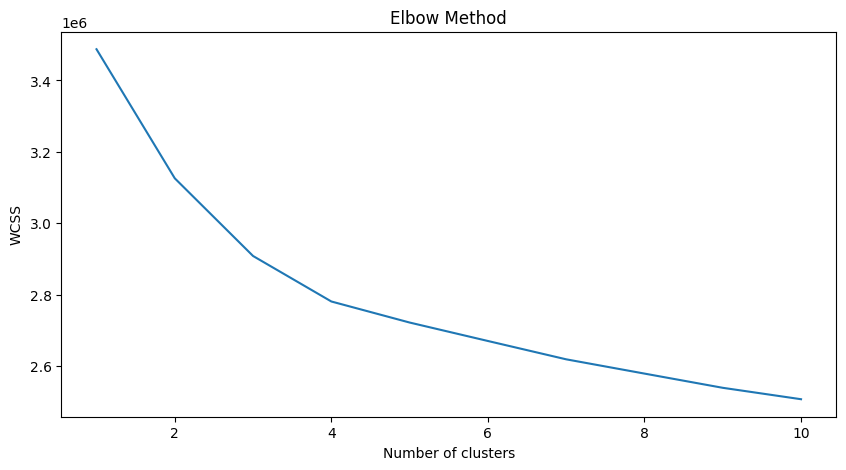

False

In [47]:
# Let's attempt the K-means clustering again, ensuring that the pca_df is loaded and utilized correctly.
# If the dataframe is too large, we may need to consider alternative strategies such as sampling.

# Attempting K-means clustering with a range of clusters to determine the optimal number via the Elbow method.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will check if the pca_df is present and then proceed with K-means clustering.
try:
    # Check if pca_df is present
    pca_df
except NameError:
    # If pca_df is not defined, we need to indicate that to the user.
    pca_df_not_found = True
else:
    pca_df_not_found = False
    # Perform K-means clustering
    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_df)
        wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
if not pca_df_not_found:
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within-cluster sum of squares
    plt.show()

pca_df_not_found


In [51]:
# Proceed with K-means clustering using 4 clusters on the PCA-reduced dataset
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df.iloc[:, :-1])  # Exclude the last column to avoid using cluster labels

# Add the cluster labels to our pca_df
pca_df['Cluster'] = cluster_labels

# Output the first few rows of our dataframe with the new cluster assignments
# pca_df.Cluster.unique()


array([2, 0, 3, 1], dtype=int32)